# **`This is an application of Supervised Machine Learning (Linear Regression) for solving a regression problem, predicting continuous numerical values (glucose levels).`**

In [16]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['glucose'] = diabetes.target

print(df.head())
print(df.info())
print(df.describe())


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  glucose  
0 -0.002592  0.019907 -0.017646    151.0  
1 -0.039493 -0.068332 -0.092204     75.0  
2 -0.002592  0.002861 -0.025930    141.0  
3  0.034309  0.022688 -0.009362    206.0  
4 -0.002592 -0.031988 -0.046641    135.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float64
 1   sex      442 non-null    float64
 2   bmi      442 non-null    floa

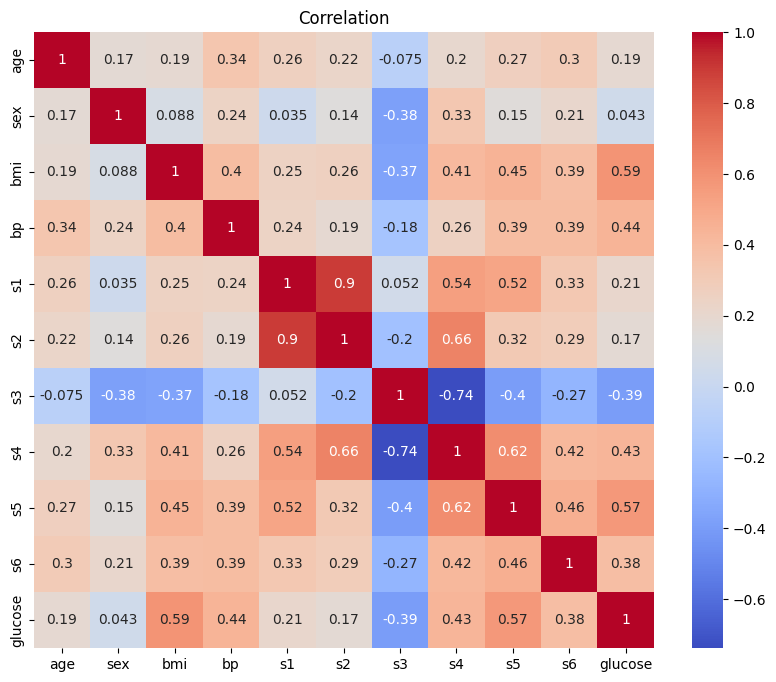

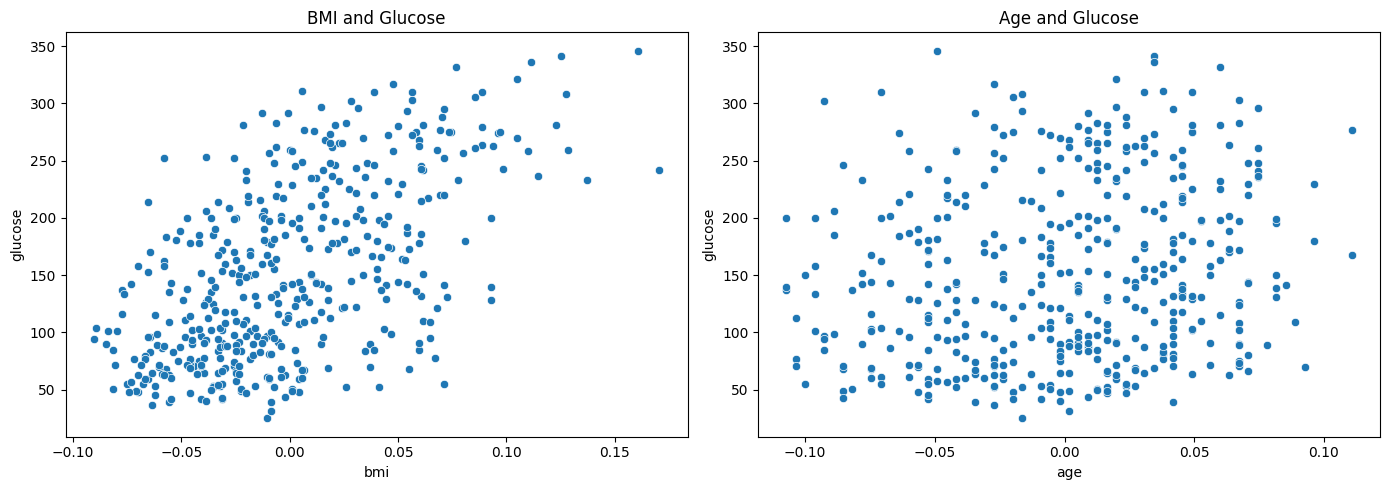

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation")
plt.show()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='bmi', y='glucose')
plt.title("BMI and Glucose")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='age', y='glucose')
plt.title("Age and Glucose")

plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['glucose'])
y = df['glucose']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(353, 10) (353,)
(89, 10) (89,)


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
Intercept: 151.34560453985995


Mean Squared Error (MSE): 2900.193628493482
R-squared (R²): 0.4526027629719195


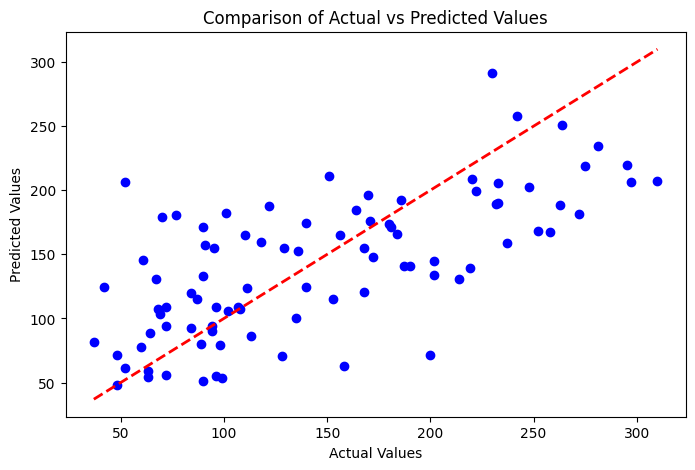

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plotting a comparison between actual and predicted values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Comparison of Actual vs Predicted Values")
plt.show()
